# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [1]:
who = "Marketing stakeholders / campaign managers who decide which channels and segments to invest in."
what = ("Identify which advertising channels and customer segments produce the best ROI and conversion, "
        "so we can allocate budget more effectively.")
how = ("Use a sorted bar chart of average ROI by channel (optionally highlight top channel), "
       "plus a second view comparing ROI/Conversion across customer segments; "
       "keep it simple: sorted bars, clear labels, minimal clutter, annotate the key takeaway.")

print("WHO:", who)
print("WHAT:", what)
print("HOW :", how)

WHO: Marketing stakeholders / campaign managers who decide which channels and segments to invest in.
WHAT: Identify which advertising channels and customer segments produce the best ROI and conversion, so we can allocate budget more effectively.
HOW : Use a sorted bar chart of average ROI by channel (optionally highlight top channel), plus a second view comparing ROI/Conversion across customer segments; keep it simple: sorted bars, clear labels, minimal clutter, annotate the key takeaway.


# 3. Homework - work with your own data

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

In [5]:
DATA_PATH = "/Users/kahkeshanhijazi/Library/CloudStorage/OneDrive-Personal/Awais/BU_Semesters/DX699- AI For Leaders/DX-699-2/DX699-O2-semester-2/Social_Media_Advertising.csv"

df = pd.read_csv(DATA_PATH)
print("Loaded:", DATA_PATH)
print("Shape:", df.shape)
display(df.head(10))

Loaded: /Users/kahkeshanhijazi/Library/CloudStorage/OneDrive-Personal/Awais/BU_Semesters/DX699- AI For Leaders/DX-699-2/DX699-O2-semester-2/Social_Media_Advertising.csv
Shape: (300000, 16)


,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony
5,323031,Women 35-44,Product Launch,15 Days,Facebook,0.02,$500.00,6.900000,Austin,Spanish,500,3001,10,Technology,2022-01-15,Cyber Circuit
6,727501,All Ages,Increase Sales,15 Days,Pinterest,0.10,$500.00,0.679240,Los Angeles,French,293,1938,1,Home,2022-10-30,Space Spruce
7,289553,Men 25-34,Product Launch,15 Days,Pinterest,0.10,$500.00,1.009922,Miami,English,293,1938,1,Food,2022-07-23,Feast Flavors
8,942511,Men 35-44,Market Expansion,15 Days,Twitter,0.14,$500.00,1.190000,Los Angeles,French,501,3003,8,Food,2022-08-14,Culinary Quest
9,255854,Women 45-60,Increase Sales,15 Days,Facebook,0.04,$500.00,1.650000,Miami,English,501,3003,9,Food,2022-03-23,Gourmet Grove


In [6]:
print("---- info() ----")
df.info()

print("\n---- describe() numeric ----")
display(df.describe())

print("\n---- describe(include='all') ----")
display(df.describe(include="all"))

---- info() ----
<class 'pandas.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  str    
 2   Campaign_Goal     300000 non-null  str    
 3   Duration          300000 non-null  str    
 4   Channel_Used      300000 non-null  str    
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  str    
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  str    
 9   Language          300000 non-null  str    
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  str    
 14  Date              300000 non-null  str    
 15  Company           300000 non-null  str    
dtypes: float64(2),

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,550444.804487,0.080009,3.177691,18153.670370,56034.236387,4.369217
std,260252.586037,0.040563,2.461200,11027.023294,32583.136334,3.156492
min,100001.000000,0.010000,0.000000,293.000000,1937.000000,1.000000
25%,325003.500000,0.050000,0.930000,8821.000000,28362.000000,1.000000
50%,551164.500000,0.080000,2.670000,17230.000000,54098.000000,4.000000
75%,776284.500000,0.110000,5.330000,26808.000000,80925.250000,7.000000
max,999998.000000,0.150000,8.000000,40000.000000,120000.000000,10.000000



---- describe(include='all') ----


,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
count,300000.000000,300000,300000,300000,300000,300000.000000,300000,300000.000000,300000,300000,300000.000000,300000.000000,300000.000000,300000,300000,300000
unique,NaN,9,4,4,4,NaN,250998,NaN,5,3,NaN,NaN,NaN,5,365,50
top,NaN,Women 18-24,Brand Awareness,15 Days,Facebook,NaN,$15000.00,NaN,Los Angeles,English,NaN,NaN,NaN,Health,2022-02-28,Balance Beam
freq,NaN,33593,75248,75000,75164,NaN,12065,NaN,60322,100116,NaN,NaN,NaN,60086,902,6163
mean,550444.804487,NaN,NaN,NaN,NaN,0.080009,NaN,3.177691,NaN,NaN,18153.670370,56034.236387,4.369217,NaN,NaN,NaN
std,260252.586037,NaN,NaN,NaN,NaN,0.040563,NaN,2.461200,NaN,NaN,11027.023294,32583.136334,3.156492,NaN,NaN,NaN
min,100001.000000,NaN,NaN,NaN,NaN,0.010000,NaN,0.000000,NaN,NaN,293.000000,1937.000000,1.000000,NaN,NaN,NaN
25%,325003.500000,NaN,NaN,NaN,NaN,0.050000,NaN,0.930000,NaN,NaN,8821.000000,28362.000000,1.000000,NaN,NaN,NaN
50%,551164.500000,NaN,NaN,NaN,NaN,0.080000,NaN,2.670000,NaN,NaN,17230.000000,54098.000000,4.000000,NaN,NaN,NaN
75%,776284.500000,NaN,NaN,NaN,NaN,0.110000,NaN,5.330000,NaN,NaN,26808.000000,80925.250000,7.000000,NaN,NaN,NaN


In [7]:
# Missing values
na_counts = df.isna().sum().sort_values(ascending=False)
na_counts = na_counts[na_counts > 0]
print("Missing values per column:")
print(na_counts if len(na_counts) else "None ✅")

# Duplicate rows
dup_rows = df.duplicated().sum()
print("\nDuplicate rows:", int(dup_rows))

# Duplicate values per column (how many repeated values; not necessarily bad)
dup_by_col = df.apply(lambda s: s.duplicated().sum())
dup_by_col = dup_by_col[dup_by_col > 0].sort_values(ascending=False)
print("\nColumns with duplicated values (count):")
display(dup_by_col.head(20))

Missing values per column:
None ✅

Duplicate rows: 0

Columns with duplicated values (count):


Language            299997
Campaign_Goal       299996
Duration            299996
Channel_Used        299996
Location            299995
Customer_Segment    299995
Target_Audience     299991
Engagement_Score    299990
Conversion_Rate     299985
Company             299950
Date                299635
ROI                 298399
Clicks              260302
Impressions         184804
Acquisition_Cost     49002
Campaign_ID          44908
dtype: int64

In [8]:
df_clean = df.copy()

# 1) Duration: "15 Days" -> 15 (int)
df_clean["Duration_Days"] = (
    df_clean["Duration"]
    .astype(str)
    .str.extract(r"(\d+)", expand=False)
    .astype("Int64")
)

# 2) Acquisition_Cost: "$500.00" -> 500.00 (float)
df_clean["Acquisition_Cost_Num"] = (
    df_clean["Acquisition_Cost"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

# 3) Date: parse to datetime
df_clean["Date_dt"] = pd.to_datetime(df_clean["Date"], errors="coerce")

# Quick validation checks
print("Nulls created after parsing:")
print("Duration_Days nulls:", int(df_clean["Duration_Days"].isna().sum()))
print("Acquisition_Cost_Num nulls:", int(df_clean["Acquisition_Cost_Num"].isna().sum()))
print("Date_dt nulls:", int(df_clean["Date_dt"].isna().sum()))

# Basic date consistency checks
today = pd.Timestamp.today().normalize()
future_dates = int((df_clean["Date_dt"] > today).sum())
print("\nFuture dates:", future_dates)

display(df_clean[["Duration", "Duration_Days", "Acquisition_Cost", "Acquisition_Cost_Num", "Date", "Date_dt"]].head(10))

Nulls created after parsing:
Duration_Days nulls: 0
Acquisition_Cost_Num nulls: 0
Date_dt nulls: 0

Future dates: 0


,Duration,Duration_Days,Acquisition_Cost,Acquisition_Cost_Num,Date,Date_dt
0,15 Days,15,$500.00,500.0,2022-02-25,2022-02-25
1,15 Days,15,$500.00,500.0,2022-05-12,2022-05-12
2,15 Days,15,$500.00,500.0,2022-06-19,2022-06-19
3,15 Days,15,$500.00,500.0,2022-09-08,2022-09-08
4,15 Days,15,$500.00,500.0,2022-08-24,2022-08-24
5,15 Days,15,$500.00,500.0,2022-01-15,2022-01-15
6,15 Days,15,$500.00,500.0,2022-10-30,2022-10-30
7,15 Days,15,$500.00,500.0,2022-07-23,2022-07-23
8,15 Days,15,$500.00,500.0,2022-08-14,2022-08-14
9,15 Days,15,$500.00,500.0,2022-03-23,2022-03-23


In [9]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)

print("\n--- Mean (numeric) ---")
display(df_clean[num_cols].mean(numeric_only=True))

print("\n--- Median (numeric) ---")
display(df_clean[num_cols].median(numeric_only=True))

print("\n--- Mode (first mode per column) ---")
modes = {}
for c in df_clean.columns:
    m = df_clean[c].mode(dropna=True)
    modes[c] = m.iloc[0] if len(m) else np.nan
display(pd.Series(modes, name="mode_first"))

Numeric columns: ['Campaign_ID', 'Conversion_Rate', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score', 'Duration_Days', 'Acquisition_Cost_Num']

--- Mean (numeric) ---


Campaign_ID             550444.804487
Conversion_Rate              0.080009
ROI                          3.177691
Clicks                    18153.67037
Impressions              56034.236387
Engagement_Score             4.369217
Duration_Days                    37.5
Acquisition_Cost_Num      7753.750796
dtype: Float64


--- Median (numeric) ---


Campaign_ID             551164.5
Conversion_Rate             0.08
ROI                         2.67
Clicks                   17230.0
Impressions              54098.0
Engagement_Score             4.0
Duration_Days               37.5
Acquisition_Cost_Num      7755.9
dtype: Float64


--- Mode (first mode per column) ---


Campaign_ID                          140816
Target_Audience                 Women 18-24
Campaign_Goal               Brand Awareness
Duration                            15 Days
Channel_Used                       Facebook
Conversion_Rate                        0.08
Acquisition_Cost                  $15000.00
ROI                                    5.57
Location                        Los Angeles
Language                            English
Clicks                                 3021
Impressions                            3301
Engagement_Score                          1
Customer_Segment                     Health
Date                             2022-02-28
Company                        Balance Beam
Duration_Days                            15
Acquisition_Cost_Num                15000.0
Date_dt                 2022-02-28 00:00:00
Name: mode_first, dtype: object

In [10]:
# Sanity checks for ranges (best-effort)
print("Conversion_Rate min/max:", df_clean["Conversion_Rate"].min(), df_clean["Conversion_Rate"].max())
print("ROI min/max:", df_clean["ROI"].min(), df_clean["ROI"].max())
print("Clicks <= Impressions? violations:", int((df_clean["Clicks"] > df_clean["Impressions"]).sum()))

# Simple quantiles for numeric columns (helpful for outlier sense)
display(df_clean[["Conversion_Rate", "ROI", "Clicks", "Impressions", "Engagement_Score", "Acquisition_Cost_Num"]]
        .quantile([0.0,0.01,0.05,0.5,0.95,0.99,1.0]))

Conversion_Rate min/max: 0.01 0.15
ROI min/max: 0.0 8.0
Clicks <= Impressions? violations: 0


,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score,Acquisition_Cost_Num
0.00,0.01,0.000000,293.0,1937.00,1.0,500.0000
0.01,0.01,0.037537,761.0,3657.99,1.0,500.0000
0.05,0.02,0.187685,2105.0,7781.00,1.0,771.3590
0.50,0.08,2.670000,17230.0,54098.00,4.0,7755.9000
0.95,0.14,7.470000,37349.0,112149.00,10.0,14736.9385
0.99,0.15,7.890000,39466.0,118418.01,10.0,15000.0000
1.00,0.15,8.000000,40000.0,120000.00,10.0,15000.0000


In [11]:
# Average ROI and Conversion by Channel
channel_summary = (df_clean
                   .groupby("Channel_Used", as_index=False)
                   .agg(avg_roi=("ROI","mean"),
                        avg_conv=("Conversion_Rate","mean"),
                        avg_cost=("Acquisition_Cost_Num","mean"),
                        campaigns=("Campaign_ID","count"))
                   .sort_values("avg_roi", ascending=False))

display(channel_summary)

# By Customer Segment
segment_summary = (df_clean
                   .groupby("Customer_Segment", as_index=False)
                   .agg(avg_roi=("ROI","mean"),
                        avg_conv=("Conversion_Rate","mean"),
                        campaigns=("Campaign_ID","count"))
                   .sort_values("avg_roi", ascending=False))

display(segment_summary)

,Channel_Used,avg_roi,avg_conv,avg_cost,campaigns
1,Instagram,4.008786,0.079764,7726.252813,75101
3,Twitter,4.002236,0.080363,7774.121680,74653
0,Facebook,3.986930,0.079870,7745.022816,75164
2,Pinterest,0.716431,0.080042,7769.738763,75082


,Customer_Segment,avg_roi,avg_conv,campaigns
4,Technology,3.192356,0.080054,59840
2,Health,3.185992,0.079935,60086
0,Fashion,3.177892,0.080100,59940
3,Home,3.169546,0.080045,60077
1,Food,3.162724,0.079913,60057


In [12]:
# Choose a manageable set of categorical columns for one-hot encoding
cat_cols = ["Target_Audience", "Campaign_Goal", "Channel_Used", "Location", "Language", "Customer_Segment", "Company"]

# Keep a modeling-friendly frame
model_df = df_clean[[
    "Conversion_Rate", "ROI", "Clicks", "Impressions", "Engagement_Score",
    "Duration_Days", "Acquisition_Cost_Num"
] + cat_cols].copy()

# One-hot encode
model_encoded = pd.get_dummies(model_df, columns=cat_cols, drop_first=True)

print("Encoded shape:", model_encoded.shape)
display(model_encoded.head())

Encoded shape: (300000, 80)


,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score,Duration_Days,Acquisition_Cost_Num,Target_Audience_Men 18-24,Target_Audience_Men 25-34,Target_Audience_Men 35-44,...,Company_Silk & Style,Company_Space Spruce,Company_Style Sphere,Company_Tech Titans,Company_Trend Tailors,Company_Vigor Valley,Company_Vital Vigor,Company_Vogue Visions,Company_Well Wish,Company_Wellness Waves
0,0.15,5.790000,500,3000,7,15,500.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0.01,7.210000,500,3000,5,15,500.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.08,0.430000,500,3000,9,15,500.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.03,0.909824,293,1937,1,15,500.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,0.13,1.422828,293,1937,1,15,500.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
label_col = "Campaign_Goal"   # or "Customer_Segment" or "Channel_Used"

counts = df_clean[label_col].value_counts()
props = (counts / counts.sum()).round(4)

print("Class distribution:", label_col)
display(pd.DataFrame({"count": counts, "proportion": props}))

Class distribution: Campaign_Goal


,count,proportion
Campaign_Goal,,
Brand Awareness,75248,0.2508
Product Launch,75030,0.2501
Increase Sales,74963,0.2499
Market Expansion,74759,0.2492


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data (p. 1-17). Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

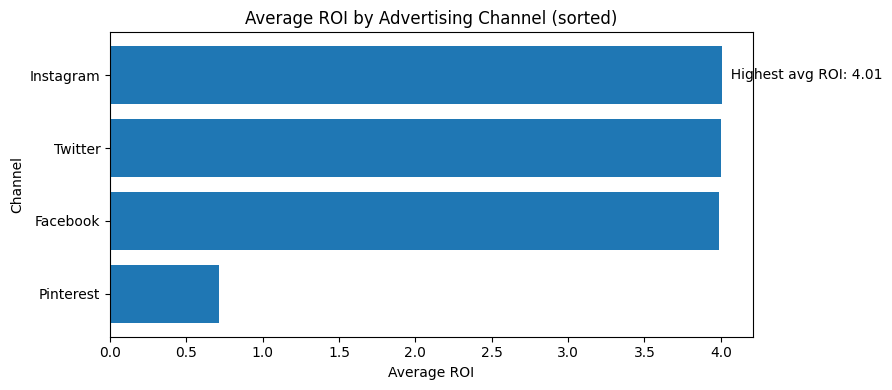

In [15]:
# Rough SWD-style chart: Average ROI by Channel (sorted) with annotation

plot_df = (df_clean.groupby("Channel_Used", as_index=False)
           .agg(avg_roi=("ROI","mean"))
           .sort_values("avg_roi", ascending=True))

x = plot_df["Channel_Used"]
y = plot_df["avg_roi"]

plt.figure(figsize=(9, 4))
plt.barh(x, y)  # horizontal bar chart helps readability
plt.title("Average ROI by Advertising Channel (sorted)")
plt.xlabel("Average ROI")
plt.ylabel("Channel")

# Annotate top channel
top_row = plot_df.iloc[-1]
plt.text(top_row["avg_roi"], top_row["Channel_Used"],
         f"  Highest avg ROI: {top_row['avg_roi']:.2f}",
         va="center")

plt.tight_layout()
plt.show()